<a href="https://colab.research.google.com/github/Existanze54/sirius-neural-networks-2024/blob/main/01S_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глубокое машинное обучение

### Семинар 1: Работа в PyTorch.

In [1]:
import torch

In [2]:
torch.__version__

'2.2.1+cu121'

In [3]:
t = torch.tensor([1.0, 2.0, 3.0])
t

tensor([1., 2., 3.])

In [5]:
t.dtype # float в Си

torch.float32

In [9]:
import numpy as np

a = np.array([1.0, 2.0, 3.0])
a

array([1., 2., 3.])

In [8]:
a.dtype # = double в Си

dtype('float64')

Torch заточен для вычислений на ГПУ, поэтому расчтеы проводятся в float32.

In [10]:
n = 4096
t = torch.randn(n, n)
a = np.random.randn(n, n)

In [11]:
%%timeit

t @ t # float32

2.4 s ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit

a @ a # float64

4.1 s ± 493 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Задача 1

Дано 2 массива $a$ и $b$ различных длин.

Получите матрицу $|m_{ij}|$, где $m_{ij} = a_i \cdot b_j$.

In [ ]:
a = torch.normal(0, 1, size=(12,))
b = torch.normal(0, 1, size=(7,))

In [ ]:
a[:,None] * b

tensor([[ 0.5908, -0.1134,  0.1447,  0.5123, -0.2788, -1.1838,  0.2478],
        [ 0.5746, -0.1103,  0.1407,  0.4983, -0.2711, -1.1514,  0.2410],
        [ 1.6585, -0.3184,  0.4061,  1.4383, -0.7826, -3.3235,  0.6956],
        [-0.8534,  0.1638, -0.2090, -0.7401,  0.4027,  1.7101, -0.3579],
        [-0.7609,  0.1461, -0.1863, -0.6599,  0.3591,  1.5248, -0.3191],
        [-0.3829,  0.0735, -0.0938, -0.3321,  0.1807,  0.7673, -0.1606],
        [ 1.3646, -0.2620,  0.3342,  1.1834, -0.6439, -2.7346,  0.5723],
        [-0.3822,  0.0734, -0.0936, -0.3314,  0.1803,  0.7659, -0.1603],
        [ 1.0001, -0.1920,  0.2449,  0.8673, -0.4719, -2.0042,  0.4195],
        [ 0.7380, -0.1417,  0.1807,  0.6400, -0.3482, -1.4789,  0.3095],
        [-0.2642,  0.0507, -0.0647, -0.2291,  0.1247,  0.5294, -0.1108],
        [-0.9055,  0.1738, -0.2217, -0.7853,  0.4273,  1.8146, -0.3798]])

### Задача 2

Дан массив $\mu_{i}$ размера $a$.

Сгенерируйте из него матрицу $|x_{ij}|$ размера $b \times a$ с числами из нормального распределения, т.ч. $x_i \sim N(\mu_i, \log b)$.

In [ ]:
a = 20
b = 10
mu = torch.arange(0., a)
mu

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [ ]:
mu[:,None].broadcast_to((a, b))

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
        [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
        [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
        [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
        [13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
        [14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
        [15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
        [16., 16., 16., 16., 16., 16., 1

In [ ]:
torch.normal(mu[:,None].broadcast_to((a, b)), torch.log(torch.tensor(b)))

tensor([[-2.7317,  0.9556,  1.5625, -1.7791,  0.8179,  0.4698, -0.1431, -0.8092,
          1.0360, -1.4513],
        [ 2.9732, -0.7009,  1.3420,  2.5644, -5.8237, -1.2105,  0.2723,  1.5960,
         -2.9864, -1.7209],
        [-1.6072,  3.8859, -1.5813,  1.1315,  2.2057,  3.9286,  0.1662,  4.7701,
         -0.2041, -3.3904],
        [ 1.1836,  5.9417, -1.8214,  7.2648,  2.0194,  2.8251,  0.9964,  1.2721,
          1.8565,  3.4549],
        [ 3.0961,  1.8819,  4.2213,  8.0696,  4.4723,  5.2611,  4.3696,  2.7013,
         -0.8823,  2.3016],
        [ 5.0910,  0.5626,  7.7898,  6.5648, -1.8395,  5.1562,  7.0272,  3.4214,
          3.1559,  4.2344],
        [ 8.4277,  3.4993,  5.4877,  2.1011,  4.1038,  7.3839,  2.7448,  5.3199,
          8.7214,  8.1007],
        [ 7.8915,  4.0791,  9.7932,  3.3987,  8.2424,  7.7899,  9.3986,  6.9453,
          5.6984,  8.9594],
        [ 7.3945, 11.1393,  8.2594,  6.8762,  8.6485,  7.3865,  8.9249, 10.6108,
          8.4892,  9.7926],
        [ 8.5324,  

### Задача 3

Дан набор объектов (_батч_) размера 1000. Каждый из объектов представляет собой некий зашумленный сигнал (при этом сигнал один и тот же).

Визуализируйте один из сигналов.

Восстановите сигнал без использования методов ML.

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/neural_networks/pytorch/data/signals.pt -O signals.pt

--2023-11-30 15:15:27--  https://data.bioml.ru/htdocs/courses/bioml/neural_networks/pytorch/data/signals.pt
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280747 (274K)
Saving to: ‘signals.pt’

signals.pt          100%[===================>] 274.17K   778KB/s    in 0.4s    

2023-11-30 15:15:28 (778 KB/s) - ‘signals.pt’ saved [280747/280747]



In [ ]:
s = torch.load("signals.pt")

In [ ]:
s.shape

torch.Size([1000, 70])

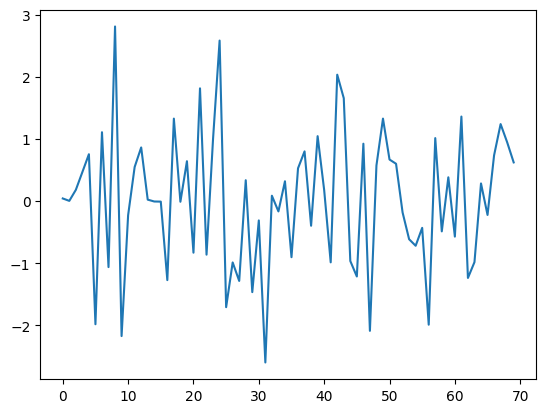

In [ ]:
import matplotlib.pyplot as plt

plt.plot(s[10].numpy())

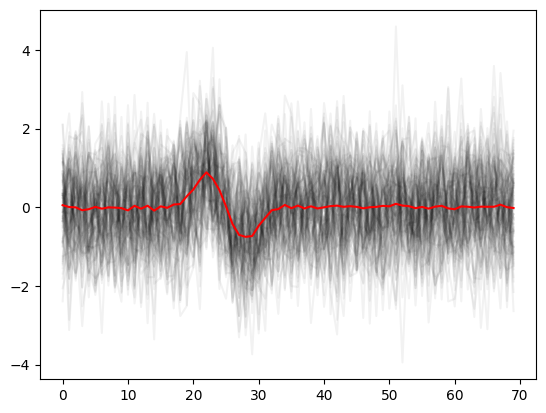

In [ ]:
plt.plot(s[:100].T.numpy(), alpha=0.05, color="k")
plt.plot(s.mean(axis=0).numpy(), color="r")

## Вычисления на GPU

_Переключиться на GPU в Google Colab можно в меню Runtime > Change runtime type_.

PyTorch позволяет использовать в вычислениях видеокарту. За счет высокой степени параллелизации вычислений и архитектурных оптимизаций для расчета на числах с плавающей запятой видеокарты позволяют ускорить вычисления в несколько раз!

In [ ]:
import torch

In [ ]:
a = torch.normal(0, 1, size=(888, 1000))
b = torch.normal(0, 2, size=(1000, 777))

In [ ]:
%%timeit
a @ b

20.6 ms ± 4.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Перенесем наши данные на GPU с помощью метода `.to`

In [ ]:
device = dievis = "cuda:0"

In [ ]:
a_gpu = a.to(device)
b_gpu = b.to(device)

In [ ]:
%%timeit
a_gpu @ b_gpu

388 µs ± 4.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Проверить, что у вас есть CUDA-совместимое устройство и оно распознано, можно с помощью функции `torch.cuda.is_available()`

In [ ]:
torch.cuda.is_available()

True

Иногда пишут так:

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Перенести можно несколькими способами:

In [ ]:
a.to("cuda:0")

tensor([[ 0.0871,  1.5803,  0.1068,  ..., -0.1111,  2.2779,  1.3019],
        [ 0.2327,  0.3974, -0.4253,  ..., -1.4914,  0.0439, -0.1961],
        [-0.3743, -1.0580,  0.4809,  ..., -1.1321,  0.9775,  0.1823],
        ...,
        [-0.3728, -1.1801, -0.2116,  ..., -0.6145,  0.7831,  0.6512],
        [ 0.5632,  0.6589,  1.5685,  ..., -2.3355,  1.4924, -0.3499],
        [ 1.1891,  2.4171, -1.2784,  ..., -0.5002, -0.2028, -1.0137]],
       device='cuda:0')

In [ ]:
a.cuda()  # not recommended

tensor([[ 0.0871,  1.5803,  0.1068,  ..., -0.1111,  2.2779,  1.3019],
        [ 0.2327,  0.3974, -0.4253,  ..., -1.4914,  0.0439, -0.1961],
        [-0.3743, -1.0580,  0.4809,  ..., -1.1321,  0.9775,  0.1823],
        ...,
        [-0.3728, -1.1801, -0.2116,  ..., -0.6145,  0.7831,  0.6512],
        [ 0.5632,  0.6589,  1.5685,  ..., -2.3355,  1.4924, -0.3499],
        [ 1.1891,  2.4171, -1.2784,  ..., -0.5002, -0.2028, -1.0137]],
       device='cuda:0')

In [ ]:
a_gpu.cpu()  # usual

tensor([[ 0.0871,  1.5803,  0.1068,  ..., -0.1111,  2.2779,  1.3019],
        [ 0.2327,  0.3974, -0.4253,  ..., -1.4914,  0.0439, -0.1961],
        [-0.3743, -1.0580,  0.4809,  ..., -1.1321,  0.9775,  0.1823],
        ...,
        [-0.3728, -1.1801, -0.2116,  ..., -0.6145,  0.7831,  0.6512],
        [ 0.5632,  0.6589,  1.5685,  ..., -2.3355,  1.4924, -0.3499],
        [ 1.1891,  2.4171, -1.2784,  ..., -0.5002, -0.2028, -1.0137]])

Если ошибиться и осуществлять операции с тензорами в разных источниках, получится ошибка:

In [ ]:
a @ b_gpu

RuntimeError: ignored

In [ ]:
a_gpu @ b

RuntimeError: ignored

Помните, что ошибка не всегда может быть такой красивой!

## Автоматический подсчет производных

В PyTorch реализован автоматический подсчет градиентов (`torch.autograd`).

Для того, чтобы осуществлять этот расчет, PyTorch хранит **граф вычислений**, по которому возможно вычислять производную любой дифференцируемой функции, полученной из комбинации дифференцируемых функций.

![calculation_graph](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/pytorch/img/calc_graph.png)

Граф вычислений для $f(x, y) = x^2 + xy + (x+y)^2$

Почему это можно посчитать по графу? Все благодаря chain rule: $$(f \circ g)'(x) = (f(g(x)))' = f'(g(x)) \cdot g'(x)$$

Посмотрим на примере.

Для того, чтобы заставить PyTorch сохранять граф вычислений, необходимо прописать параметр `requires_grad=True`.

In [ ]:
a = torch.tensor([-0.3, 0.1, 0.2], requires_grad=True)

In [ ]:
m = a.mean()
m

tensor(-4.9671e-09, grad_fn=<MeanBackward0>)

$m(a) = \dfrac{a_0 + a_1 + a_2}{3}$

In [ ]:
m.backward()

$\dfrac{\partial m}{\partial a_i} = \dfrac{1}{3}$

In [ ]:
a.grad

tensor([0.3333, 0.3333, 0.3333])

In [ ]:
a = torch.tensor([-0.3, 0.1, 0.2], requires_grad=True)

$s(a) = \dfrac{a_0^2 + a_1^2 + a_2^2}{3}$

In [ ]:
s = (a ** 2).mean()

In [ ]:
s

tensor(0.0467, grad_fn=<MeanBackward0>)

In [ ]:
s.backward()

In [ ]:
a.grad

tensor([-0.2000,  0.0667,  0.1333])

$\dfrac{\partial s}{\partial a_i} = \dfrac{2}{3}a_i$

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(-2.0, requires_grad=True)

In [ ]:
f = x + y
g = f**2 + x

In [ ]:
g.backward()

In [ ]:
x.grad, y.grad

### Ручная оптимизация простейшей модели

Рассмотрим простейшую линейную модель, работающую на 2 признаках.

In [ ]:
weights = torch.tensor([-0.1, 0.1])
weights

tensor([-0.1000,  0.1000])

Сгенерируем данные с зависимостью $y = x_1 - 2.5x_2$

In [ ]:
N = 100  # number of objects
x_1 = torch.rand(size=(N,))
x_2 = torch.randn(size=(N,))
y = x_1 - 2.5 * x_2 + torch.normal(0, 0.2, size=(N,))
objects = torch.stack([x_1, x_2]).T
objects

tensor([[ 0.8265,  0.8013],
        [ 0.8546, -1.0868],
        [ 0.3448, -0.5334],
        [ 0.7665, -0.9688],
        [ 0.3166,  0.2024],
        [ 0.1374,  0.7431],
        [ 0.1498,  0.1099],
        [ 0.1828, -1.6826],
        [ 0.1970,  1.1353],
        [ 0.7218,  1.5124],
        [ 0.1614,  1.3254],
        [ 0.1068,  0.5889],
        [ 0.8192, -1.4590],
        [ 0.7201, -0.2535],
        [ 0.6457, -0.0526],
        [ 0.8873, -1.1231],
        [ 0.8507, -0.3565],
        [ 0.5676,  0.8974],
        [ 0.3865,  0.0340],
        [ 0.4413, -0.6889],
        [ 0.6075, -1.0097],
        [ 0.9336, -1.1882],
        [ 0.4195,  0.0607],
        [ 0.7411, -1.2695],
        [ 0.3852, -0.5902],
        [ 0.3174, -0.6419],
        [ 0.1269,  0.5420],
        [ 0.3384,  0.8193],
        [ 0.0894, -1.1506],
        [ 0.8245,  0.9535],
        [ 0.1193, -1.0474],
        [ 0.0748, -2.1391],
        [ 0.7531,  0.5546],
        [ 0.9176, -2.1203],
        [ 0.9163, -0.8503],
        [ 0.8190, -0

Как получить предсказание весов?

In [ ]:
predicted = (objects * weights).sum(axis=1)
predicted

tensor([-0.0025, -0.1941, -0.0878, -0.1735, -0.0114,  0.0606, -0.0040, -0.1865,
         0.0938,  0.0791,  0.1164,  0.0482, -0.2278, -0.0974, -0.0698, -0.2010,
        -0.1207,  0.0330, -0.0352, -0.1130, -0.1617, -0.2122, -0.0359, -0.2011,
        -0.0975, -0.0959,  0.0415,  0.0481, -0.1240,  0.0129, -0.1167, -0.2214,
        -0.0199, -0.3038, -0.1767, -0.1012, -0.0812, -0.1685, -0.1654, -0.0520,
        -0.2461, -0.0663, -0.2611, -0.0971, -0.0171,  0.0824,  0.0175, -0.0103,
        -0.0200,  0.0864,  0.0774, -0.1009, -0.0360,  0.0889, -0.0845, -0.1403,
         0.1292, -0.2111, -0.1559, -0.1532, -0.0628, -0.0004,  0.0103, -0.0686,
        -0.1094, -0.0939, -0.0482, -0.1647, -0.0023, -0.1180, -0.0670,  0.0259,
         0.0396, -0.0369, -0.0701, -0.2091, -0.1010, -0.2142, -0.0014, -0.1039,
         0.0497, -0.0379, -0.1591,  0.0103, -0.0358,  0.0344,  0.0622, -0.1502,
         0.0402, -0.2304, -0.0395,  0.1263, -0.0911, -0.1485,  0.0967, -0.1034,
        -0.3361,  0.0585,  0.0674,  0.02

Как понять, насколько сильно мы ошиблись?

In [ ]:
mse = ((predicted - y) ** 2).mean()
mse

tensor(7.6811)

In [ ]:
mse.backward()

RuntimeError: ignored

Что нужно исправить?

In [ ]:
weights = torch.tensor([-0.1, 0.1], requires_grad=True)
weights

tensor([-0.1000,  0.1000], requires_grad=True)

In [ ]:
predicted = (objects * weights).sum(axis=1)
mse = ((predicted - y) ** 2).mean()
mse

tensor(0.0393, grad_fn=<MeanBackward0>)

In [ ]:
mse.backward()

Смотрим на градиент:

In [ ]:
weights

tensor([ 1.0112, -2.5083], requires_grad=True)

In [ ]:
weights.grad

tensor([-0.0304,  0.0004])

Что нужно сделать с градиентом, чтобы исправить веса?

In [ ]:
weights.data = weights - weights.grad * 0.1

In [ ]:
weights.grad.data.zero_()
#weights.requires_grad_(True)

tensor([0., 0.])

#### Задача 4

Автоматизируйте оптимизацию градиента самостоятельно.

### Другие операции с градиентом

Часть операций бывает нужно выполнить без сохранения градиента. Например, такими операциями будут промежуточные оценки качества модели в процессе обучения.

In [ ]:
a = torch.tensor([1.0, 2.0], requires_grad=True)

with torch.no_grad():
    b = a.sum()

Как мы видим, граф не сохранялся:

In [ ]:
b.backward()

RuntimeError: ignored

Будьте внимательны: каждая операция с тензором, для которого требуется подсчет градиентов, активирует режим подсчета градиентов для тензоров на выходе. В результате при неаккуратном использовании видеопамять может оказаться полностью забитой графом вычислений.

Тензоры весов модели имеют параметр `requires_grad=True` по умолчанию!

## Matrix-by-matrix product

Consider composition of two linear operators:

1. $y = Bx$
2. $z = Ay$

Then, $z = Ay =  A B x = C x$, where $C$ is the **matrix-by-matrix product**.

A product of an $n \times k$ matrix $A$ and a $k \times m$ matrix $B$ is a $n \times m$ matrix $C$ with the elements  
$$
   c_{ij} = \sum_{s=1}^k a_{is} b_{sj}, \quad i = 1, \ldots, n, \quad j = 1, \ldots, m
$$

Complexity of a naive algorithm for MM is $\mathcal{O}(n^3)$.  
Matrix-by-matrix product is the **core** for almost all efficient algorithms in linear algebra. Basically, all the NLA algorithms are reduced to a sequence of matrix-by-matrix products, so efficient implementation of MM reduces the complexity of numerical algorithms by the same factor. However, implementing MM is not easy at all!

## Demo
Let us do a short demo and compare a `np.dot()` procedure which in my case uses MKL with a hand-written matrix-by-matrix routine in Python and also its Cython version (and also gives a very short introduction to Cython).

In [18]:
import numpy as np

def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]

In [13]:
%load_ext Cython

In [15]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%cython  %%cython_inline  %%cython_pyximport  %%de

In [19]:
%%cython
import numpy as np

def cython_matmul(double [:, :] a, double[:, :] b):
    cdef int n = a.shape[0]
    cdef int k = a.shape[1]
    cdef int m = b.shape[1]
    cdef int i
    cdef int j
    cdef int s
    c = np.zeros((n, m))
    cdef double[:, :] cview = c
    for i in range(n):
        for j in range(m):
            for s in xrange(k):
                c[i, j] += a[i, s] * b[s, j]
    return c

In [26]:
n = 100
a = np.random.randn(n, n)
b = np.random.randn(n, n)
%timeit c_manual = matmul(a, b)
%timeit c_cython = cython_matmul(a, b)
%timeit c_np = np.dot(a, b)

701 ms ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
262 ms ± 34.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
121 µs ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%%cython
import numpy as np

def cython_matmul_bad(double [:, :] a, double[:, :] b):
    cdef int n = a.shape[0]
    cdef int k = a.shape[1]
    cdef int m = b.shape[1]
    cdef int i
    cdef int j
    cdef int s
    c = np.zeros((n, m))
    cdef double[:, :] cview = c
    for j in range(m): # внешний цикл по столбцам
        for i in range(n):
            for s in xrange(k):
                c[i, j] += a[i, s] * b[s, j]
    return c

In [ ]:
n = 1000
a = np.random.randn(n, n)
b = np.random.randn(n, n)
%timeit c_manual = matmul(a, b)
%timeit c_cython = cython_matmul(a, b)
%timeit c_np = np.dot(a, b)
%timeit c_cython_bad = cython_matmul_bad(a, b)